## Share price performance analysis

## Import libraries

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import fix_yahoo_finance as yf
# import quandl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the data of Tesla

In [2]:
# set today to today
today = str(dt.datetime.today()).split()[0]
today

'2018-10-28'

In [3]:
company = 'TSLA'
start = dt.datetime(2012,1,1)
end = today

In [4]:
tesla = pdr.get_data_yahoo(company, start = start, end = end)
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [5]:
type(tesla.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-22,261.859985,252.589996,260.679993,260.950012,5600300,260.950012
2018-10-23,297.929993,262.100006,263.869995,294.140015,19027800,294.140015
2018-10-24,304.440002,285.730011,301.049988,288.500000,20058300,288.500000
2018-10-25,321.000000,301.010010,317.220001,314.859985,20840700,314.859985
2018-10-26,339.899994,306.649994,308.250000,330.899994,27389700,330.899994


## Getting the data of Ford and GM

In [7]:
company = 'F'

In [8]:
ford = pdr.get_data_yahoo(company, start = start, end = end)
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,8.484531
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,8.614123
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.835192
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.926668
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.995278


In [9]:
company = 'GM'

In [10]:
gm = pdr.get_data_yahoo(company, start = start, end = end)
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,17.163847
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,17.245390
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,18.077078
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,18.688618
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,18.623386


## Visualizing the Data

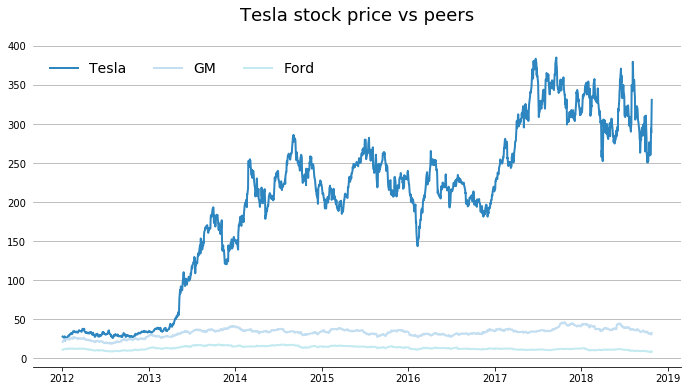

In [132]:
fig = plt.figure()
fig.set_size_inches(10,5)    
ax = fig.add_axes([0,0,0.9,0.9])
ax.set_title('Tesla stock price vs peers', fontsize = 18, y = 1.05)
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('none')
ax.plot(tesla['Close'], lw = 2, label = 'Tesla', c = '#2E86C1')
ax.plot(gm['Close'], lw = 2, label = 'GM', c = '#c3def1')
ax.plot(ford['Close'], lw = 2, label = 'Ford', c = '#c3eaf1')
ax.legend(loc='upper center', bbox_to_anchor=(0.23, 0.98),  shadow=False, ncol=3, prop={'size': 14}, frameon = False)
sns.despine(left = True, bottom = False, right = True, top = True )

## Volume plot

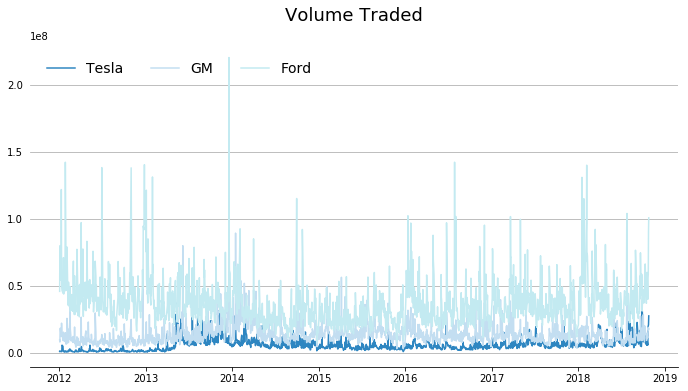

In [131]:
fig = plt.figure()
fig.set_size_inches([10,5])
ax = fig.add_axes([0,0,0.9,0.9])
ax.plot(tesla['Volume'], label = 'Tesla', c = '#2E86C1')
ax.plot(gm['Volume'], label = 'GM', c = '#c3def1')
ax.plot(ford['Volume'], label = 'Ford', c = '#c3eaf1')
ax.set_title("Volume Traded", fontsize = 18, y = 1.05)
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('none')
ax.legend(loc='upper center', bbox_to_anchor=(0.23, 0.98),  shadow=False, ncol=3, prop={'size': 14}, frameon = False)
sns.despine(left = True, bottom = False, right = True, top = True )

In [16]:
ford['Volume'].argmax()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2013-12-18 00:00:00')

## Dollar Volume Amount Traded

In [22]:
tesla['Total Traded'] = tesla['Close']*tesla['Volume']
ford['Total Traded'] = ford['Close']*ford['Volume']
gm['Total Traded'] = gm['Close']*gm['Volume']

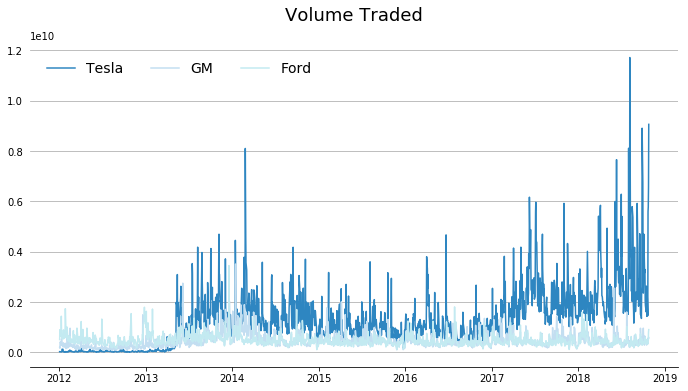

In [130]:
fig = plt.figure()
fig.set_size_inches([10,5])
ax = fig.add_axes([0,0,0.9,0.9])
ax.plot(tesla['Total Traded'], label = 'Tesla', c = '#2E86C1')
ax.plot(gm['Total Traded'], label = 'GM', c = '#c3def1')
ax.plot(ford['Total Traded'], label = 'Ford', c = '#c3eaf1')
ax.set_title("Volume Traded", fontsize = 18, y = 1.05)
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('none')
ax.legend(loc='upper center', bbox_to_anchor=(0.23, 0.98),  shadow=False, ncol=3, prop={'size': 14}, frameon = False)
sns.despine(left = True, bottom = False, right = True, top = True )

In [25]:
tesla['Total Traded'].argmax()    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2018-08-07 00:00:00')

## Moving Average(MA)  MA50 and MA200 for GM

In [26]:
gm['MA50'] = gm['Close'].rolling(50).mean()
gm['MA200'] = gm['Close'].rolling(200).mean()

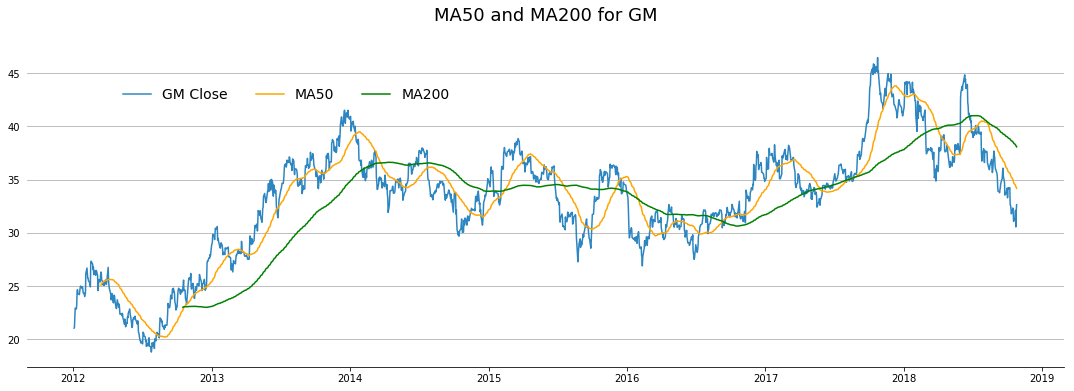

In [129]:
fig = plt.figure()
fig.set_size_inches([16,5])
ax = fig.add_axes([0,0,0.9,0.9])

ax.plot(gm['Close'], label = 'GM Close', c = '#2E86C1')
ax.plot(gm['MA50'], label = 'MA50', c = 'orange')
ax.plot(gm['MA200'], label = 'MA200', c = 'green')

ax.set_title("MA50 and MA200 for GM", fontsize = 18, y = 1.05)
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('none')
ax.legend(loc='upper center', bbox_to_anchor=(0.25, 0.9),  shadow=False, ncol=3, prop={'size': 14}, frameon = False)
sns.despine(left = True, bottom = False, right = True, top = True )

In [34]:
from pandas.plotting import scatter_matrix

In [35]:
car_comp = pd.concat([tesla['Close'],gm['Close'],ford['Close']],axis=1)

In [36]:
car_comp.columns = ['Tesla Close','GM Close','Ford Close']

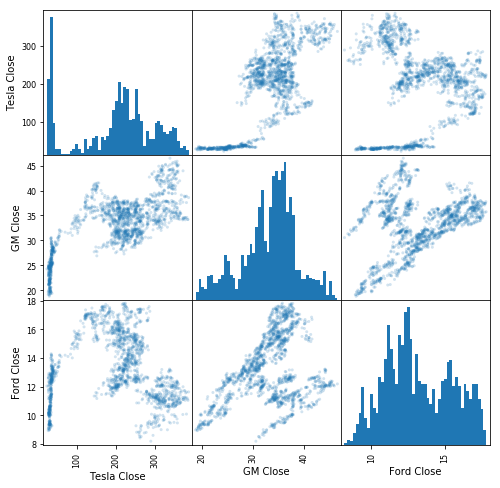

In [37]:
# You can use a semi-colon to remove the axes print outs
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

## Candle stick

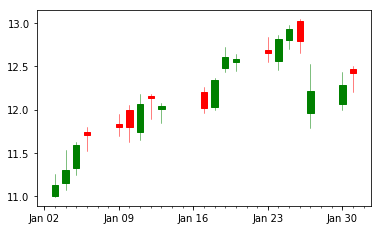

In [44]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
ford_reset = ford.loc['2012-01':'2012-01'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g',colordown='r');

## Basic financial analysis

### Daily percentage change

$ r_t = \frac{p_t}{p_{t-1}} -1$

In [49]:
tesla['reuturns'] = (tesla['Close'] / tesla['Close'].shift(1)) -1
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,reuturns
Date,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.606105e+07,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.746007e+07,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.726916e+07,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.654133e+07,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.444325e+07,0.012635


In [74]:
tesla['returns'] = tesla['Close'].pct_change(1)  # This is a pandas built-in method
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,reuturns,returns
Date,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.606105e+07,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.746007e+07,-0.013177,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.726916e+07,-0.021292,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.654133e+07,-0.007743,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.444325e+07,0.012635,0.012635


In [53]:
ford['returns'] = ford['Close'].pct_change(1)
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,8.484531,5.087512e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,8.614123,9.008948e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.835192,7.867002e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.926668,7.007346e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.995278,6.369817e+08,0.007686


In [54]:
gm['returns'] = gm['Close'].pct_change(1)
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,17.163847,1.962134e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,17.245390,1.661692e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,18.077078,3.964129e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,18.688618,4.179347e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,18.623386,2.760100e+08,NaN,NaN,-0.003490


## Histrogram of each companies returns

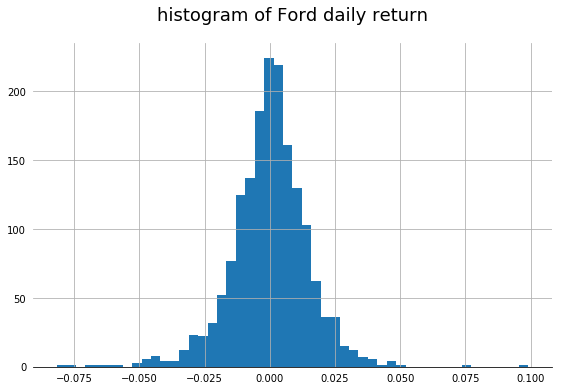

In [70]:
fig = plt.figure()
fig.set_size_inches([8,5])
ax = fig.add_axes([0,0,0.9,0.9])

ford['returns'].hist(bins=50)

ax.set_title("histogram of Ford daily return", fontsize = 18, y = 1.05)
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
sns.despine(left = True, bottom = False, right = True, top = True )

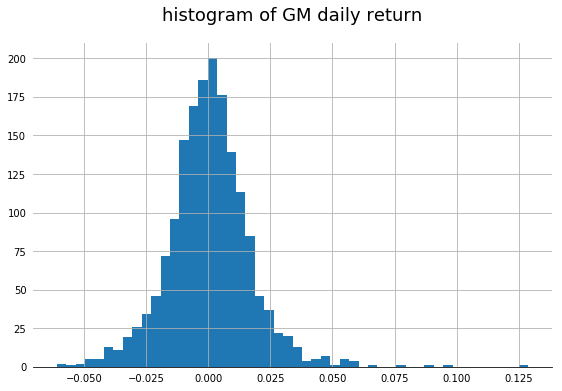

In [69]:
fig = plt.figure()
fig.set_size_inches([8,5])
ax = fig.add_axes([0,0,0.9,0.9])

gm['returns'].hist(bins=50)

ax.set_title("histogram of GM daily return", fontsize = 18, y = 1.05)
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
sns.despine(left = True, bottom = False, right = True, top = True )

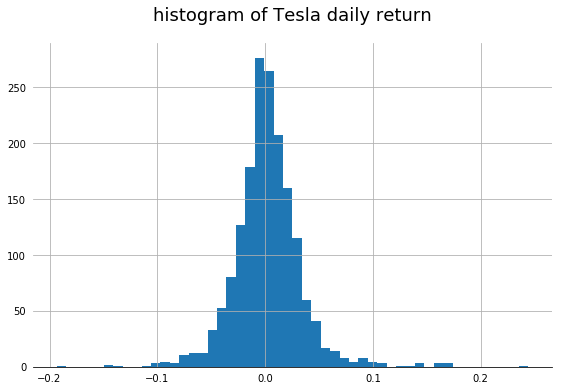

In [75]:
fig = plt.figure()
fig.set_size_inches([8,5])
ax = fig.add_axes([0,0,0.9,0.9])

tesla['returns'].hist(bins=50)

ax.set_title("histogram of Tesla daily return", fontsize = 18, y = 1.05)
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
sns.despine(left = True, bottom = False, right = True, top = True )

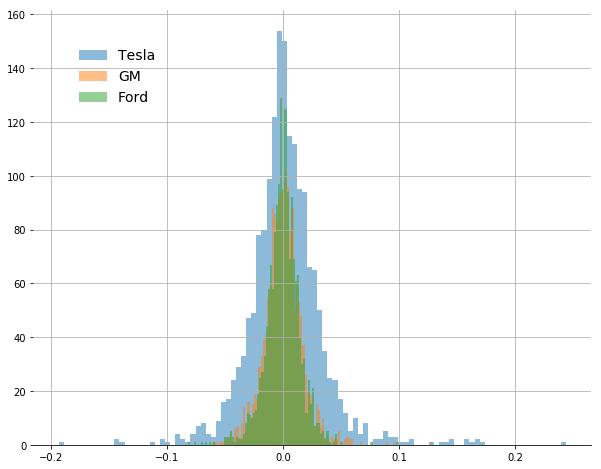

In [128]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
#plt.legend()

plt.legend(loc='upper center', bbox_to_anchor=(0.15, 0.94),  shadow=False, ncol=1, prop={'size': 14}, frameon = False)
sns.despine(left = True, bottom = False, right = True, top = True )

## Tesla has the widest plot acording to KDE

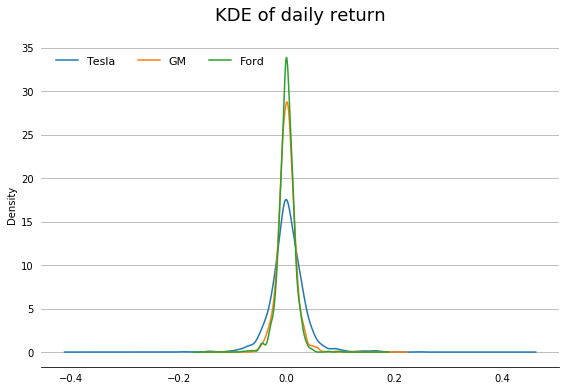

In [117]:
fig = plt.figure()
fig.set_size_inches([8,5])
ax = fig.add_axes([0,0,0.9,0.9])


tesla['returns'].plot(kind='kde',label='Tesla')
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')



ax.set_title("KDE of daily return", fontsize = 18, y = 1.05)
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.legend(loc='upper center', bbox_to_anchor=(0.23, 0.99),  shadow=False, ncol=3, prop={'size': 11}, frameon = False)
sns.despine(left = True, bottom = False, right = True, top = True )

## Box plot compareing the returns

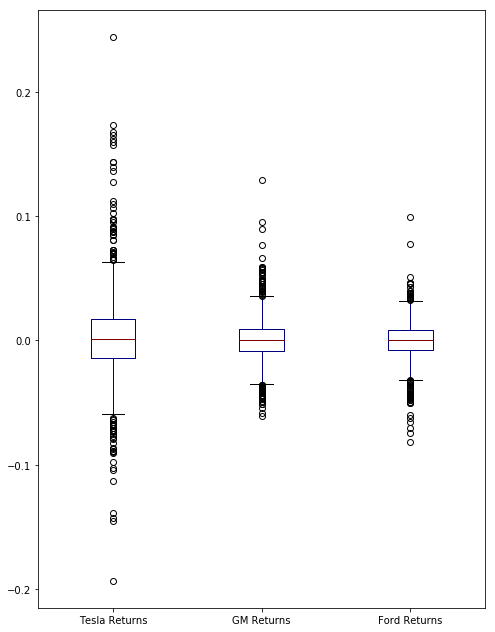

In [92]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1) #create a new pandas dataframe 
box_df.columns = ['Tesla Returns','GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

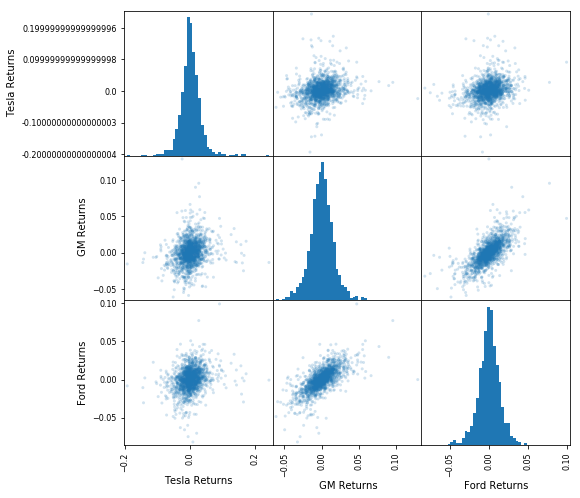

In [83]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [85]:
box_df.head()

,Tesla Returns,GM Returns,Ford Returns
Date,,,
2012-01-03,NaN,NaN,NaN
2012-01-04,-0.013177,0.004751,0.015274
2012-01-05,-0.021292,0.048227,0.025664
2012-01-06,-0.007743,0.033829,0.010354
2012-01-09,0.012635,-0.003490,0.007686


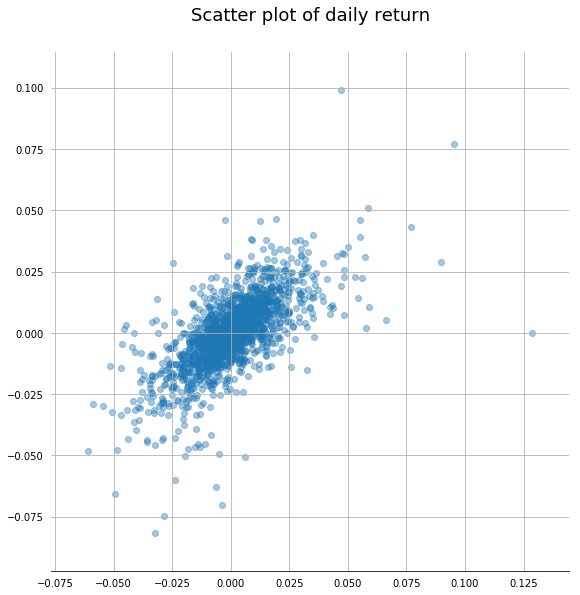

In [101]:
fig = plt.figure()
fig.set_size_inches([8,8])
ax = fig.add_axes([0,0,0.9,0.9])

ax.scatter(x=box_df['GM Returns'],y=box_df['Ford Returns'],alpha=0.4)

ax.set_title("Scatter plot of daily return", fontsize = 18, y = 1.05)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
sns.despine(left = True, bottom = False, right = True, top = True )

## Cumulative daily return

df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

In [103]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod() #compod() is a pandas method

In [104]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,reuturns,returns,Cumulative Return
Date,,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.606105e+07,NaN,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.746007e+07,-0.013177,-0.013177,0.986823
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.726916e+07,-0.021292,-0.021292,0.965812
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.654133e+07,-0.007743,-0.007743,0.958333
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.444325e+07,0.012635,0.012635,0.970442


In [105]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

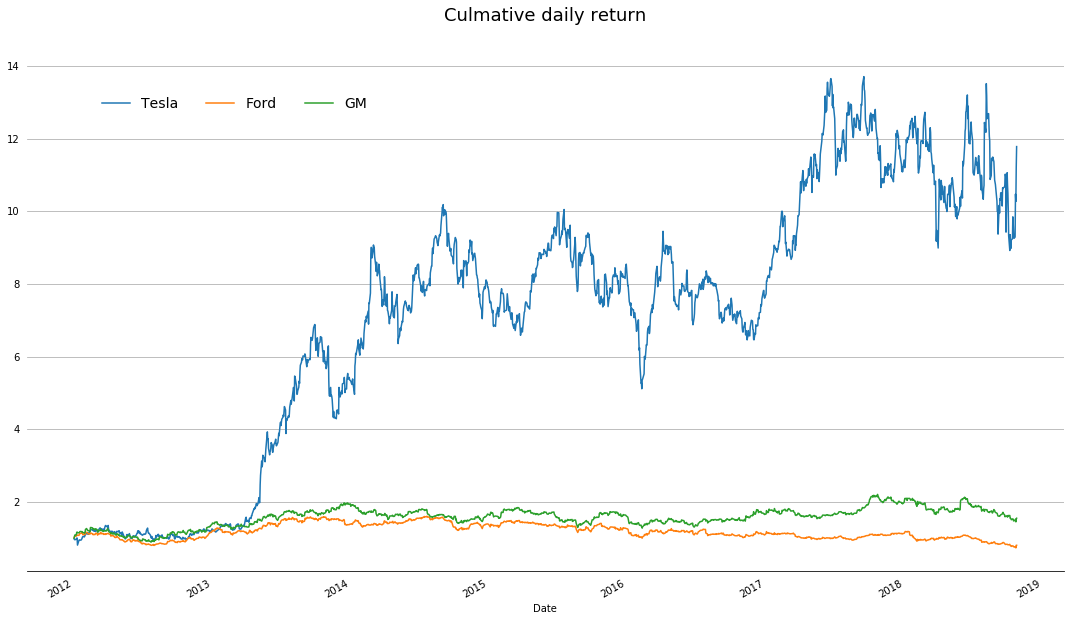

In [112]:
fig = plt.figure()
fig.set_size_inches([16,8])
ax = fig.add_axes([0,0,0.9,0.9])

tesla['Cumulative Return'].plot(label='Tesla')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')

ax.set_title("Culmative daily return", fontsize = 18, y = 1.05)
ax.yaxis.grid(True)
#ax.xaxis.grid(True)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.legend(loc='upper center', bbox_to_anchor=(0.2, 0.94),  shadow=False, ncol=3, prop={'size': 14}, frameon = False)
sns.despine(left = True, bottom = False, right = True, top = True )